1/1 [==============================] - 0s 234ms/step


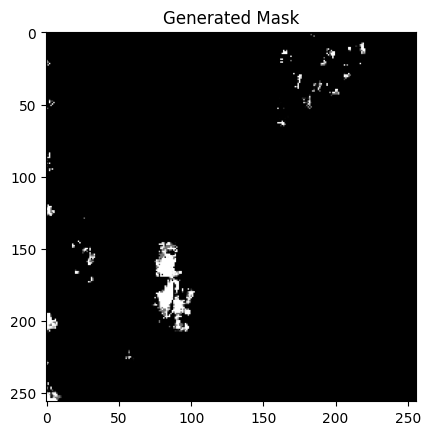

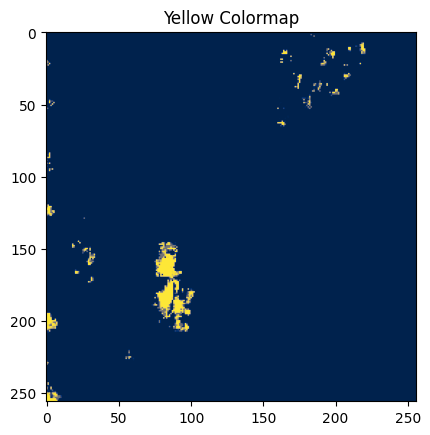

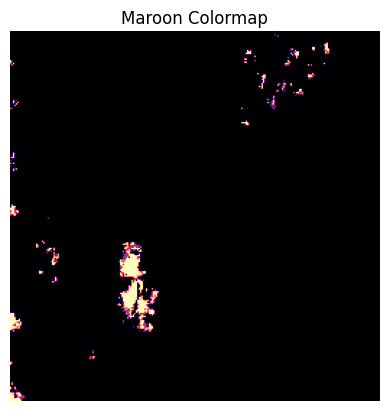

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('model_output.h5')  # Replace 'model_output.h5' with your model path

# Function to preprocess the image
def preprocess_image(image_path, target_size=(256, 256)):
    try:
        img = image.load_img(image_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        print(f"Error preprocessing image: {e}")
        return None 

# Function to predict using the model
def predict_building(image_path):
    preprocessed_image = preprocess_image(image_path)
    if preprocessed_image is not None:
        predictions = model.predict(preprocessed_image)
        return predictions
    else:
        return None

# Path to your input image
input_image_path = r"C:\Users\Svastik Kanwar\Downloads\jik.jfif"  # Replace with your image path

# Perform prediction
if input_image_path:
    predictions = predict_building(input_image_path)

    if predictions is not None:

        mask = predictions[0]  # Extract the generated mask (adjust indexing if needed)

        # Display the generated mask
        plt.imshow(mask, cmap='gray')  # Assuming the mask is grayscale
        
        plt.title("Generated Mask")
        # Change the colormap to 'cividis' for yellow and 'magma' for maroon
        plt.figure()
        plt.imshow(mask, cmap='cividis')  # Yellow colormap
        plt.title('Yellow Colormap')

        plt.figure()
        plt.imshow(mask, cmap='magma')  # Maroon colormap
        plt.title('Maroon Colormap')
        plt.axis('off')
        plt.show()
    else:
        print(" failed..")
else:
    print("Invalid")
